###### Maestría Inteligencia de Negocios y Análisis de Datos
###### Curso: Statistical Learning II
###### Alumno: 22008375- Leonel Eduardo Contreras
###### Sección L

# Hoja de Trabajo 1: Experimentación con Redes Neuronales

## Introducción
Este ejercicio tiene como objetivo profundizar en la comprensión de las redes neuronales mediante la experimentación. A través de variaciones en la arquitectura y parámetros, se busca entender cómo se comporta y aprende una red neuronal. Utilizaremos el dataset "Heart Disease" disponible en el UCI Machine Learning Repository.

## Dataset "Heart Disease"
Puedes descargar el dataset directamente desde el siguiente enlace:
http://archive.ics.uci.edu/dataset/45/heart+disease. Recuerda que vamos a estar utilizando CRISP-DM para crear los modelos. El primer paso es comprender los datos. Ese link te proporciona la información necesaria para entender el dataset. Las columnas y el rol que cada columna va a jugar en tu modelo (variables independientes y dependiente). Como menciona la documentación, utiliza solo la base de datos de Cleveland.

## Sección 1: Preparación de Datos
* Descarga y carga el dataset "Heart Disease".
* Realiza un breve análisis exploratorio: ¿Qué tipo de datos contiene? ¿Cuántos ejemplos hay?. 
* Procesa el dataset: normaliza o estandariza si es necesario, divide el dataset en conjuntos de entrenamiento y prueba.

Nuestro enfoque de hoy no es un mega modelo sino comprender mejor como se comportan las redes neuronales. Realiza lo necesario pero nada muy extravagante.

In [16]:
# Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import tensorflow.keras as kr


In [17]:
# Cargar dataset
column_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
dataset=pd.read_csv('processed.cleveland.data',sep=',', encoding='latin-1', names=column_names)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [18]:
# Tipos de datos
dataset.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [19]:
# Varaibles categoricas (tipo object)
dataset['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [20]:
dataset['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [21]:
# Imputar los valores "?" ya que provoca que las variables sean "object" en lugar de numericas

# Se reemplaza el valor por el de mayor frecuencia
dataset['ca']=dataset['ca'].replace('?',0.0)
dataset['thal']=dataset['thal'].replace('?',3.0)

# Convertir las variables tipo objeto a numericos
dataset['ca']= pd.to_numeric(dataset['ca'])
dataset['thal']= pd.to_numeric(dataset['ca'])



In [22]:
# Cantidad de registros y forma
dataset.shape

(303, 14)

In [23]:
# Datos nulos
dataset.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [24]:
# Tipos de datos posterior a imputación
dataset.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [25]:
# Tipos de varaibles

continuas=[]
discretas=[]

for i in dataset.columns:
    if (len(dataset[i].unique())>30):
        continuas.append(i)
    else:
        discretas.append(i)
print(f'{continuas=}') 
print(f'{discretas=}') 

continuas=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
discretas=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']


In [26]:
# Resumen de datos
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,0.663366,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.934375,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,3.000000,4.000000


In [27]:
# Normalizar las variables continuas

scaler=MinMaxScaler()

dataset[continuas]=scaler.fit_transform(dataset[continuas])



In [28]:
# Resumen de datos
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.529978,0.679868,3.158416,0.355564,0.275555,0.148515,0.990099,0.600055,0.326733,0.167678,1.600660,0.663366,0.663366,0.937294
std,0.188305,0.467299,0.960126,0.166035,0.118212,0.356198,0.994971,0.174618,0.469794,0.187270,0.616226,0.934375,0.934375,1.228536
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,3.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.562500,1.000000,3.000000,0.339623,0.262557,0.000000,1.000000,0.625954,0.000000,0.129032,2.000000,0.000000,0.000000,0.000000
75%,0.666667,1.000000,4.000000,0.433962,0.340183,0.000000,2.000000,0.725191,1.000000,0.258065,2.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,4.000000


In [29]:
# Clases de la variable dependiente
dataset['num'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [35]:
# Dividir las columnas del dataset en variables independientes (X) y dependientes (Y)
x=dataset.iloc[:,0:13].values
y=dataset.iloc[:,13].values

# Convertir los enteros en variables dummy (One hot encoding)
y_dummy=tf.keras.utils.to_categorical(y)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train,X_test,y_train,y_test=train_test_split(x,y_dummy,test_size=0.3,random_state=2023)



## Sección 2: Construcción de la Red Neuronal

Construye una red neuronal básica utilizando Keras.

* Define la arquitectura: número de capas, neuronas por capa, función de activación.
* Compila el modelo especificando la función de pérdida, el optimizador y métricas adicionales.
* Realiza una breve descripción escrita de la arquitectura que has definido.

In [36]:
# Arquitectura red neuronal

model= kr.models.Sequential() # Inicializar con la clase sequiential 
model.add(kr.layers.Dense(8,input_dim=13,activation='relu')) # Capa densa con 8 neuronas, funcion activacion ReLu y filas de datos con 13 variables
model.add(kr.layers.Dense(5,activation='softmax')) # Capa salida, con 5 neuronas por las clases/categorias del dataset


# Compilacion del modelo
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) # Funcion perdida, optimizador y metrica de evaluacion


In [37]:
# Ajustar el modelo
model.fit(X_train, y_train, epochs=150, batch_size=10) #Entrenamiento del modelo

Epoch 1/150
22/22 [==============================] - 1s 3ms/step - loss: 1.6472 - accuracy: 0.1887
Epoch 2/150
22/22 [==============================] - 0s 3ms/step - loss: 1.5637 - accuracy: 0.3208
Epoch 3/150
22/22 [==============================] - 0s 3ms/step - loss: 1.4977 - accuracy: 0.4057
Epoch 4/150
22/22 [==============================] - 0s 3ms/step - loss: 1.4471 - accuracy: 0.4858
Epoch 5/150
22/22 [==============================] - 0s 4ms/step - loss: 1.4065 - accuracy: 0.5047
Epoch 6/150
22/22 [==============================] - 0s 4ms/step - loss: 1.3730 - accuracy: 0.5094
Epoch 7/150
22/22 [==============================] - 0s 4ms/step - loss: 1.3460 - accuracy: 0.5142
Epoch 8/150
22/22 [==============================] - 0s 3ms/step - loss: 1.3234 - accuracy: 0.5142
Epoch 9/150
22/22 [==============================] - 0s 3ms/step - loss: 1.3025 - accuracy: 0.5142
Epoch 10/150
22/22 [==============================] - 0s 3ms/step - loss: 1.2863 - accuracy: 0.5142
Epoch 11/

In [38]:
# Evaluar el modelo: Imprimir la precision del modelo con data Test
loss, accuracy = model.evaluate(X_test,y_test)
print(f'{loss=},{accuracy=}')

3/3 [==============================] - 0s 4ms/step - loss: 1.1557 - accuracy: 0.5714
loss=1.1556860208511353,accuracy=0.5714285969734192


In [ ]:
''' Se inicializa la red neuronal con la clase sequiential.
    Luego se agrega la capa densa, la cual se agregaron 8 neuronas, la funcion de activación RELU, 
    y con 13 variables que son las caracteristicas de entrada.
    Posterior se agrega otra capa densa, que es la de salida, la cual tiene 5 neuronas 
    por la cantidad de clases de la variable dependiente, con funcion de activacion softmax, ideal para clasificar multiples clases.
    Por ultimo se compila el modelo con la funcion de perdida categorical crossentropy, que es la idela para clasificacion multiclase.
    Adam como metodo de optimización y Accuracy como metrica de evaluacion del modelo '''

## Sección 3: Experimentación

Utiliza ciclos para las siguientes pruebas. Debes entrenar varios modelos variando el parámetro indicado en cada inciso según el rango y paso proporcionado. Recuerda almacenar tus resultados porque te servirán en la siguiente sección.

### Variabilidad en Capas Ocultas:

Las redes con demasiadas capas pueden tardar mucho tiempo en entrenarse, especialmente si no se dispone de un hardware adecuado.

* Rango: Entre 1 y 10 capas.
* Paso: 1 capa.
* Nota: En muchos problemas, incluso 2-3 capas son suficientes para obtener buenos resultados. Por encima de eso, a veces se necesita una arquitectura especializada o un problema muy complejo para justificar más capas.

In [77]:
# Listas para almacenar los resultados
capas_ocultas = []
accuracies_1 = []
losses_1 = []
precision_1=[]
perdida_1=[]

# Variar las capas ocultas
for capa_oculta in range(1,10,1): # Variar de 1 a 10, en pasos de 1
    print(f'Numero de capas ocultas:{capa_oculta}')

    # Crear el modelo red neuronal
    model_1= kr.models.Sequential()
    # Crear capa entrada
    model_1.add(kr.layers.Dense(8,input_dim=13,activation='relu'))

    # Agregar capas ocultas 
    for i in range(capa_oculta):
        model_1.add(kr.layers.Dense(8,activation='relu')) # variacion de capas con 8 neuronas

    # Agregar capa de salida
    model_1.add(kr.layers.Dense(5,activation='softmax'))

    # Compilacion del modelo
    model_1.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

    # Entrenar el modelo
    history_1=model_1.fit(X_train, y_train, epochs=150, batch_size=10)
    precision_1.append(history_1.history['accuracy'])
    perdida_1.append(history_1.history['loss'])

    
    # Evaluar modelo
    loss, accuracy = model_1.evaluate(X_test,y_test)
    capas_ocultas.append(capa_oculta)
    accuracies_1.append(accuracy)
    losses_1.append(loss)

Numero de capas ocultas:1
Epoch 1/150
22/22 [==============================] - 1s 3ms/step - loss: 1.8249 - accuracy: 0.0896
Epoch 2/150
22/22 [==============================] - 0s 3ms/step - loss: 1.6453 - accuracy: 0.1981
Epoch 3/150
22/22 [==============================] - 0s 3ms/step - loss: 1.5581 - accuracy: 0.4623
Epoch 4/150
22/22 [==============================] - 0s 3ms/step - loss: 1.5053 - accuracy: 0.4906
Epoch 5/150
22/22 [==============================] - 0s 3ms/step - loss: 1.4686 - accuracy: 0.5142
Epoch 6/150
22/22 [==============================] - 0s 4ms/step - loss: 1.4413 - accuracy: 0.5236
Epoch 7/150
22/22 [==============================] - 0s 3ms/step - loss: 1.4162 - accuracy: 0.5236
Epoch 8/150
22/22 [==============================] - 0s 3ms/step - loss: 1.3949 - accuracy: 0.5236
Epoch 9/150
22/22 [==============================] - 0s 3ms/step - loss: 1.3785 - accuracy: 0.5283
Epoch 10/150
22/22 [==============================] - 0s 3ms/step - loss: 1.3565 - 

### Variabilidad en Neuronas:

El número de neuronas por capa influye en la capacidad de la red. Sin embargo, demasiadas neuronas pueden hacer que el entrenamiento sea más lento y puede causar sobreajuste.

* Rango: Entre 10 y 1000 neuronas.
* Paso: Incremento logarítmico

In [85]:
# Listas para almacenar los resultados
numero_neuronas = []
accuracies_2 = []
losses_2 = []
precision_2=[]
perdida_2=[]

# Definir el incremiento logaritmico
array = np.logspace(np.log10(10), np.log10(1000), num=10, base=10, dtype=int)

# Variar el numero de neuronas
for num_neuronas in array:

    print(f'Numero de neuronas por capas:{num_neuronas}')

    # Crear el modelo red neuronal
    model_2= kr.models.Sequential()
    # Crear capa entrada
    model_2.add(kr.layers.Dense(num_neuronas,input_dim=13,activation='relu')) # variacion de neuronas
    # Agregar capa de salida
    model_2.add(kr.layers.Dense(5,activation='softmax'))

    # Compilacion del modelo
    model_2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

    # Entrenar el modelo
    history_2=model_2.fit(X_train, y_train, epochs=150, batch_size=10)
    precision_2.append(history_2.history['accuracy'])
    perdida_2.append(history_2.history['loss'])
    
    # Evaluar modelo
    loss, accuracy = model_2.evaluate(X_test,y_test)
    numero_neuronas.append(num_neuronas)
    accuracies_2.append(accuracy)
    losses_2.append(loss)

Numero de neuronas por capas:10
Epoch 1/150
22/22 [==============================] - 1s 4ms/step - loss: 1.9904 - accuracy: 0.2170
Epoch 2/150
22/22 [==============================] - 0s 4ms/step - loss: 1.6558 - accuracy: 0.2500
Epoch 3/150
22/22 [==============================] - 0s 3ms/step - loss: 1.4188 - accuracy: 0.3868
Epoch 4/150
22/22 [==============================] - 0s 3ms/step - loss: 1.2976 - accuracy: 0.5283
Epoch 5/150
22/22 [==============================] - 0s 3ms/step - loss: 1.2352 - accuracy: 0.5802
Epoch 6/150
22/22 [==============================] - 0s 3ms/step - loss: 1.2004 - accuracy: 0.5802
Epoch 7/150
22/22 [==============================] - 0s 4ms/step - loss: 1.1750 - accuracy: 0.5802
Epoch 8/150
22/22 [==============================] - 0s 3ms/step - loss: 1.1575 - accuracy: 0.5708
Epoch 9/150
22/22 [==============================] - 0s 7ms/step - loss: 1.1426 - accuracy: 0.5802
Epoch 10/150
22/22 [==============================] - 0s 4ms/step - loss: 1.1

### Variabilidad en Épocas:

Demasiadas épocas sin una técnica de parada temprana pueden llevar al sobreajuste.

* Rango: Entre 10 y 5000 épocas.
* Paso: Incremento logarítmico

In [91]:
# Listas para almacenar los resultados
numero_epocas = []
accuracies_3 = []
losses_3 = []
precision_3= []
perdida_3= []

# Definir el incremiento logaritmico
array = np.logspace(np.log10(10), np.log10(5000), num=5, base=10, dtype=int)

# Variar el numero de epocas
for num_epocas in array:

    print(f'Numero de epocas en la red neuronal:{num_epocas}')

    # Crear el modelo red neuronal
    model_3= kr.models.Sequential()
    # Crear capa entrada
    model_3.add(kr.layers.Dense(8,input_dim=13,activation='relu'))
    # Agregar capa de salida
    model_3.add(kr.layers.Dense(5,activation='softmax'))

    # Compilacion del modelo
    model_3.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

    # Entrenar el modelo
    history_3=model_3.fit(X_train, y_train, epochs=num_epocas, batch_size=10) # variacion de epocas
    precision_3.append(history_3.history['accuracy'])
    perdida_3.append(history_3.history['loss'])
    
    # Evaluar modelo
    loss, accuracy = model_3.evaluate(X_test,y_test)
    numero_epocas.append(num_epocas)
    accuracies_3.append(accuracy)
    losses_3.append(loss)

Numero de epocas en la red neuronal:10
Epoch 1/10
22/22 [==============================] - 1s 2ms/step - loss: 2.3446 - accuracy: 0.1321
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 2.1056 - accuracy: 0.1415
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 1.9341 - accuracy: 0.1415
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 1.8223 - accuracy: 0.2170
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 1.7407 - accuracy: 0.2925
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 1.6777 - accuracy: 0.3632
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 1.6298 - accuracy: 0.4340
Epoch 8/10
22/22 [==============================] - 0s 3ms/step - loss: 1.5825 - accuracy: 0.4811
Epoch 9/10
22/22 [==============================] - 0s 3ms/step - loss: 1.5430 - accuracy: 0.5142
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 1.3936 -

## Tamaño de Batch:

El tamaño del batch influye en la velocidad de entrenamiento y la estabilidad del modelo. Un batch muy grande puede no caber en la memoria, mientras que uno muy pequeño puede hacer que el entrenamiento sea inestable.

* Rango: Entre 1 (Stochastic Gradient Descent) y el tamaño del conjunto de datos (Batch Gradient Descent).
* Paso: Incremento logarítmico

In [99]:
# Listas para almacenar los resultados
tam_batch = []
accuracies_4 = []
losses_4 = []
precision_4 =[]
perdida_4=[]

# Definir el incremiento logaritmico
array = np.logspace(np.log10(1), np.log10(303), num=7, base=10, dtype=int)

# Variar el tamaño de batch
for num_batch in array:

    print(f'Tamaño de batch en la red neuronal:{num_batch}')

    # Crear el modelo red neuronal
    model_4= kr.models.Sequential()
    # Crear capa entrada
    model_4.add(kr.layers.Dense(8,input_dim=13,activation='relu'))
    # Agregar capa de salida
    model_4.add(kr.layers.Dense(5,activation='softmax'))

    # Compilacion del modelo
    model_4.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

    # Entrenar el modelo
    history_4=model_4.fit(X_train, y_train, epochs=150, batch_size=num_batch) # variacion de tamaño batch
    precision_4.append(history_4.history['accuracy'])
    perdida_4.append(history_4.history['loss'])
    
    # Evaluar modelo
    loss, accuracy = model_4.evaluate(X_test,y_test)
    tam_batch.append(num_batch)
    accuracies_4.append(accuracy)
    losses_4.append(loss)

Tamaño de batch en la red neuronal:1
Epoch 1/150
212/212 [==============================] - 1s 3ms/step - loss: 2.5218 - accuracy: 0.1368
Epoch 2/150
212/212 [==============================] - 1s 2ms/step - loss: 1.7264 - accuracy: 0.2358
Epoch 3/150
212/212 [==============================] - 1s 3ms/step - loss: 1.5305 - accuracy: 0.4292
Epoch 4/150
212/212 [==============================] - 0s 2ms/step - loss: 1.4478 - accuracy: 0.4811
Epoch 5/150
212/212 [==============================] - 0s 2ms/step - loss: 1.3908 - accuracy: 0.5330
Epoch 6/150
212/212 [==============================] - 0s 2ms/step - loss: 1.3423 - accuracy: 0.5330
Epoch 7/150
212/212 [==============================] - 0s 2ms/step - loss: 1.2864 - accuracy: 0.5189
Epoch 8/150
212/212 [==============================] - 0s 2ms/step - loss: 1.2073 - accuracy: 0.5236
Epoch 9/150
212/212 [==============================] - 1s 2ms/step - loss: 1.1554 - accuracy: 0.5283
Epoch 10/150
212/212 [==============================] 

## Sección 4: Análisis y Reflexión

Con los datos recopilados de las pruebas anteriores, genera gráficos que permitan comparar y analizar el rendimiento del modelo. Te recomendamos utilizar librerías como matplotlib o seaborn para esta tarea. Luego de cada gráfico debes incluir un conclusión de lo que has aprendido con la experimentación y los gráficos.

### Variabilidad en Capas Ocultas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de capas ocultas.
* Eje Y: Precisión y pérdida.

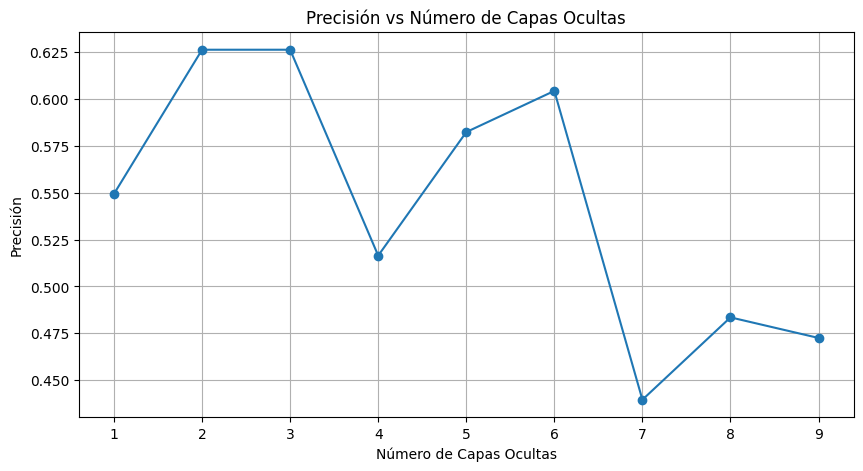

In [116]:
# Crear el gráfico de Precisión vs Número de capas ocultas
plt.figure(figsize=(10, 5))
plt.plot(capas_ocultas, accuracies_1, marker='o')
plt.title('Precisión vs Número de Capas Ocultas')
plt.xlabel('Número de Capas Ocultas')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

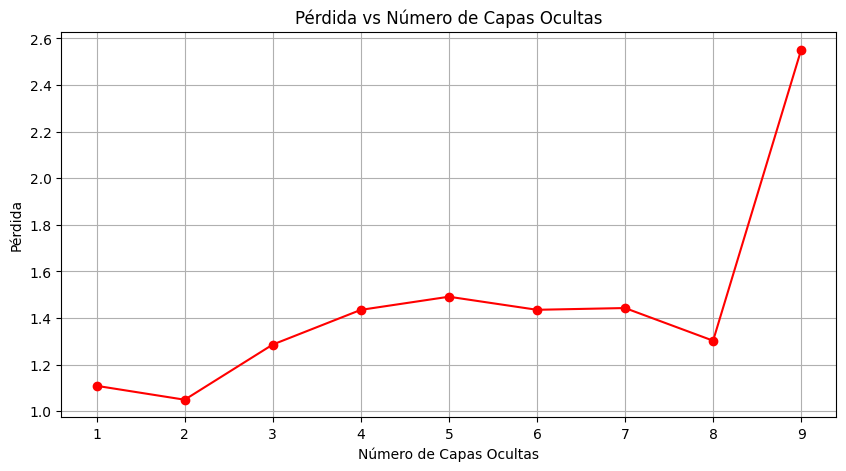

In [117]:
# Crear el gráfico de Pérdida vs Número de capas ocultas
plt.figure(figsize=(10, 5))
plt.plot(capas_ocultas, losses_1, marker='o', color='r')
plt.title('Pérdida vs Número de Capas Ocultas')
plt.xlabel('Número de Capas Ocultas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()

In [24]:
### Como se puede observar en los graficos de precision y perdida para la variabilidad de las capas ocultas, el mejor rendimiento
### se encuentra para 2 capas ocultas, ya que la precision toma el valor mas alto junto con 3 capas ocultas, y en perdida el valor mas
### pequeño se encuentra para 2 capas ocultas. Los mejores valores estan para dos capas ocultas.

### Las neuronas para las capas ocultas se defineron en 8, que es la misma cantidad que se establecio para la capa oculta de la capa de entrada
### que fue un estandar que se utiliza para este laboratorio.

### Variabilidad en Neuronas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de neuronas.
* Eje Y: Precisión y pérdida.

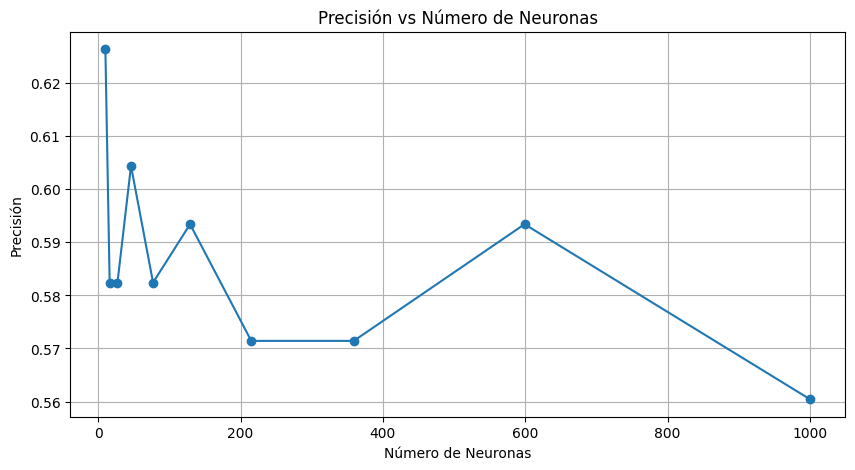

In [118]:
# Crear el gráfico de Precisión vs Número de neuronas
plt.figure(figsize=(10, 5))
plt.plot(numero_neuronas, accuracies_2, marker='o')
plt.title('Precisión vs Número de Neuronas')
plt.xlabel('Número de Neuronas')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

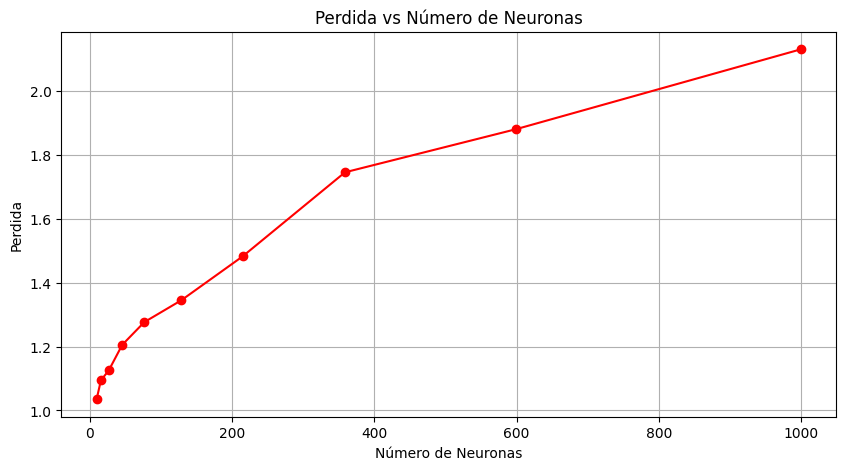

In [119]:
# Crear el gráfico de Perdida vs Número de neuronas
plt.figure(figsize=(10, 5))
plt.plot(numero_neuronas, losses_2, marker='o',color='r')
plt.title('Perdida vs Número de Neuronas')
plt.xlabel('Número de Neuronas')
plt.ylabel('Perdida')
plt.grid(True)
plt.show()

In [26]:
### Como se puede observar en los graficos de precision y perdida para la variabilidad de numero de neuronas, el mejor rendimiento
### se encuentra para 1 neurona, ya que la precision toma el valor mas alto considerablemente con respecto al resto, y en perdida el valor mas
### pequeño se encuentra para 1 neurona. Los mejores valores estan para 1 neurona.

### Variabilidad en Épocas

Realiza 1 gráfico

* Eje X: Número de épocas.
* Eje Y: Precisión y pérdida.

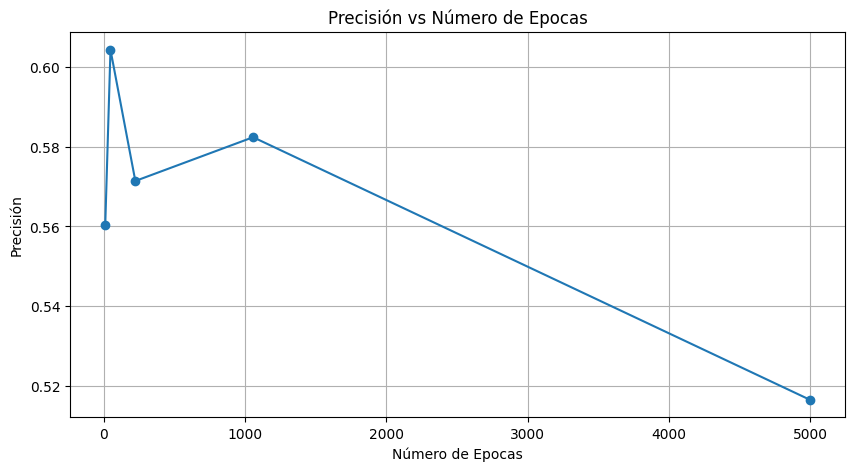

In [123]:
# Crear el gráfico de Precisión vs Número de epocas
plt.figure(figsize=(10, 5))
plt.plot(numero_epocas, accuracies_3, marker='o')
plt.title('Precisión vs Número de Epocas')
plt.xlabel('Número de Epocas')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

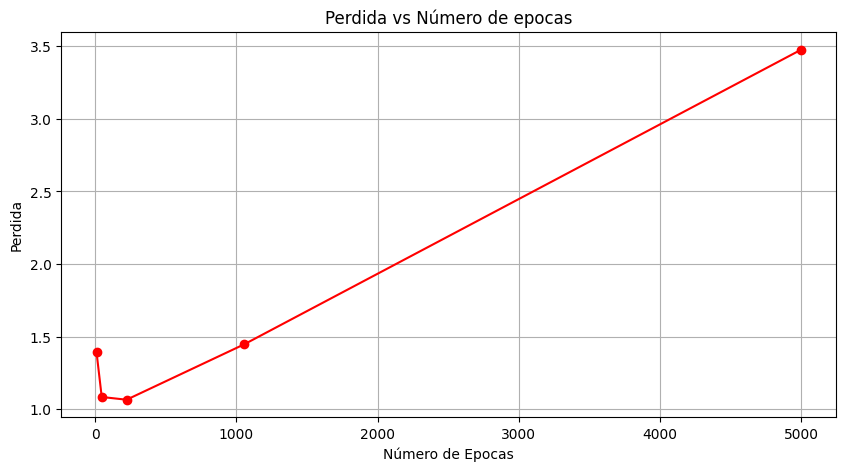

In [121]:
# Crear el gráfico de Perdida vs Número de epocas
plt.figure(figsize=(10, 5))
plt.plot(numero_epocas, losses_3, marker='o',color='r')
plt.title('Perdida vs Número de epocas')
plt.xlabel('Número de Epocas')
plt.ylabel('Perdida')
plt.grid(True)
plt.show()

In [28]:
### Como se puede observar en los graficos de precision y perdida para la variabilidad de epocas, el mejor rendimiento
### se encuentra para 47 epocas, ya que la precision toma el valor mas alto considerablemente con respecto al resto, y en perdida el valor mas
### pequeño se encuentra para 223 epocas, pero el segundo mas pequeño es para 47 epocas, entonces los mejores valores estan para 
### 47 epocas.

### Tamaño de Batch:

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.
* Eje X: Tamaño del batch.
* Eje Y: Precisión y pérdida.

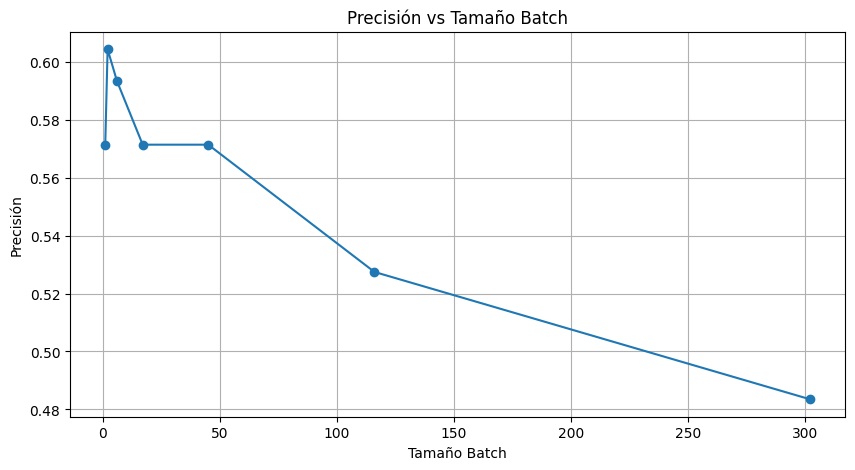

In [125]:
# Crear el gráfico de Precisión vs Tamaño Batch
plt.figure(figsize=(10, 5))
plt.plot(tam_batch, accuracies_4, marker='o')
plt.title('Precisión vs Tamaño Batch')
plt.xlabel('Tamaño Batch')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

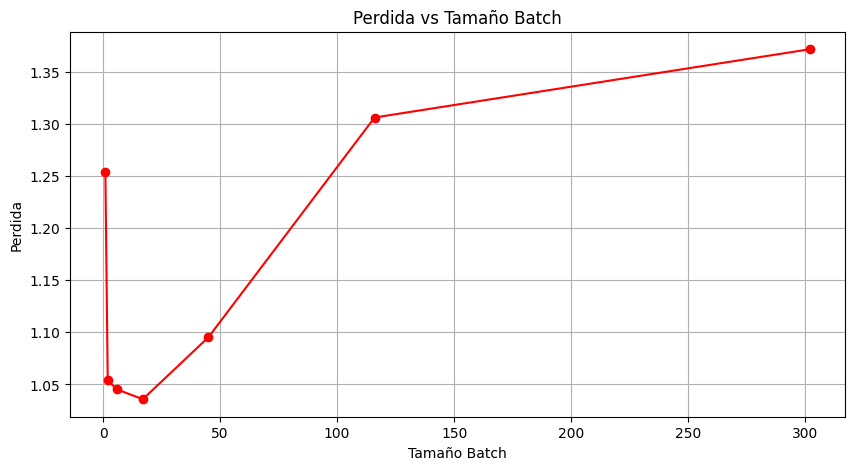

In [126]:
# Crear el gráfico de Perdida vs Tamaño Batch
plt.figure(figsize=(10, 5))
plt.plot(tam_batch, losses_4, marker='o',color='r')
plt.title('Perdida vs Tamaño Batch')
plt.xlabel('Tamaño Batch')
plt.ylabel('Perdida')
plt.grid(True)
plt.show()

In [30]:
### Como se puede observar en los graficos de precision y perdida para la variabilidad del numero de batch, el mejor rendimiento
### se encuentra para 2 de Batch, ya que la precision toma el valor mas alto, y en perdida el valor mas
### pequeño se encuentra para 17 de Batch, pero entre los mas pequeños esta el de 2 de Batch, entonces los mejores valores estan para 
### 2 de Batch.